In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [2]:
IMAGE_SIZE = [224, 224]

train_path = '/Users/vishnuvardhanvankayalapati/Desktop/FinalProject_Bird_Image_Classification/5Images_per_class/train'
valid_path = '/Users/vishnuvardhanvankayalapati/Desktop/FinalProject_Bird_Image_Classification/5Images_per_class/test'

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


for layer in vgg.layers:
  layer.trainable = False

folders = glob('/Users/vishnuvardhanvankayalapati/Desktop/FinalProject_Bird_Image_Classification/5Images_per_class/train/*')

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
# model.summary()

# tell the model what cost and optimization method to use
learning_rate = 0.001 

model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(learning_rate=learning_rate),
  metrics=['accuracy']
)


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/Users/vishnuvardhanvankayalapati/Desktop/FinalProject_Bird_Image_Classification/5Images_per_class/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/Users/vishnuvardhanvankayalapati/Desktop/FinalProject_Bird_Image_Classification/5Images_per_class/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 800 images belonging to 200 classes.
Found 200 images belonging to 200 classes.


In [3]:
'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 192s 8s/step - accuracy: 0.0121 - loss: 8.9539 - val_accuracy: 0.0200 - val_loss: 7.3630
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10


2024-03-10 01:22:05.032557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-10 01:22:05.040608: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 193s 8s/step - accuracy: 0.3793 - loss: 3.6837 - val_accuracy: 0.0400 - val_loss: 7.1674
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10


2024-03-10 01:25:18.004431: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-10 01:25:18.008771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 193s 8s/step - accuracy: 0.6828 - loss: 1.6607 - val_accuracy: 0.0800 - val_loss: 6.6144
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10


2024-03-10 01:28:30.715445: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-10 01:28:30.719509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 209s 8s/step - accuracy: 0.7997 - loss: 0.9065 - val_accuracy: 0.0800 - val_loss: 6.8474
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10


2024-03-10 01:31:59.294717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-10 01:31:59.301398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 ━━━━━━━━━━━━━━━━━━━━ 196s 8s/step - accuracy: 0.8810 - loss: 0.5175 - val_accuracy: 0.0950 - val_loss: 6.5698
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


2024-03-10 01:35:14.939462: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-10 01:35:14.943552: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


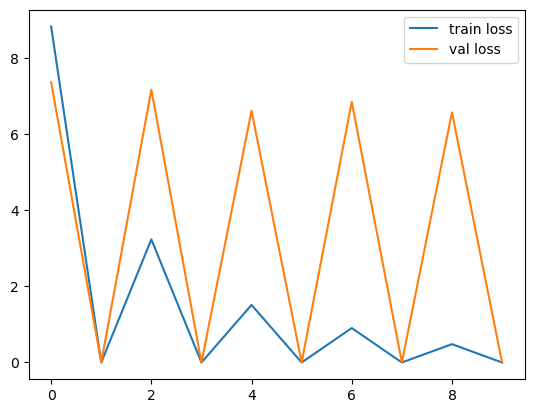

In [5]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

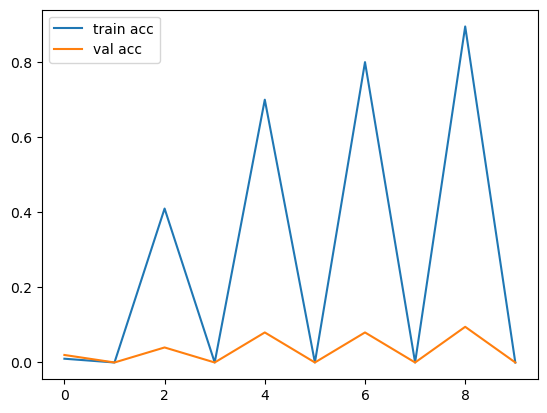

In [6]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [7]:
# Evaluate the model on training data
train_scores = model.evaluate(training_set)
print("Training Accuracy: %.2f%%" % (train_scores[1] * 100))

# Evaluate the model on testing data
test_scores = model.evaluate(test_set)
print("Testing Accuracy: %.2f%%" % (test_scores[1] * 100))


25/25 ━━━━━━━━━━━━━━━━━━━━ 156s 6s/step - accuracy: 0.9351 - loss: 0.3715
Training Accuracy: 93.75%
7/7 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.0833 - loss: 6.6881
Testing Accuracy: 9.50%


In [4]:
# for entire data
# Training accuracy at 10 epochs is 74.65 and Testing is 21.71.
# Training accuracy at 10 epochs is 91.16 and Testing is 23.48.

In [8]:
# model.save('/Users/vishnuvardhanvankayalapati/Desktop/FinalProject_Bird_Image_Classification/Entire_Data/VGG-16_models/Vgg16_model_50.h5')